In [1]:
# Nome: Lucas Galvão Janot
# RA: 22251259

### Importação de bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### Transformação e Pré-processamento dos dados

In [3]:
# Carregar os dados
df_train = pd.read_csv('train_futebol.csv')
df_test_submission = pd.read_csv('test_futebol.csv')

In [4]:
# Transformação de variáveis categóricas
le = LabelEncoder()
base_unida = pd.concat([df_train,df_test_submission])

le.fit(base_unida['Home'])
df_train['Home'] = le.transform(df_train['Home'])
df_test_submission['Home'] = le.transform(df_test_submission['Home'])

le.fit(base_unida['Away'])
df_train['Away'] = le.transform(df_train['Away'])
df_test_submission['Away'] = le.transform(df_test_submission['Away'] )


le.fit(base_unida['evento'])
df_train['evento'] = le.transform(df_train['evento'])
df_test_submission['evento'] = le.transform(df_test_submission['evento'])


df_train['WIN'] = df_train['WIN'].map({'Home': 1, 'Away': 2, 'Draw': 0})

# Selecionar as features e o target
features = df_train.drop(['Date', 'Time', 'WIN', 'evento'], axis=1)
target = df_train['WIN']

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Definição e Treino do Modelo

O RandomForest é um bom candidato para prever resultados da Premier League devido à sua robustez contra overfitting, combinando várias árvores de decisão para evitar que o modelo se ajuste excessivamente aos dados de treino. Ele lida bem com dados categóricos e numéricos, facilitando o pré-processamento no contexto do futebol. Além disso, permite avaliar a importância das variáveis, o que ajuda a identificar fatores críticos nas previsões, como o local da partida ou o desempenho recente dos times. Por ser um modelo que captura relações não lineares, ele é adequado para a natureza complexa e dinâmica do futebol. Além disso, o RandomForest é resistente ao ruído, tornando-o eficiente mesmo com dados incertos ou com variabilidade significativa.

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Acurácia: 1.00
AUC: 1.00


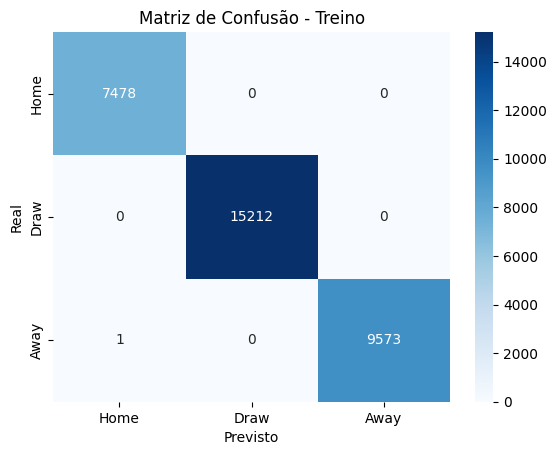

              precision    recall  f1-score   support

        Draw       1.00      1.00      1.00      7478
        Home       1.00      1.00      1.00     15212
        Away       1.00      1.00      1.00      9574

    accuracy                           1.00     32264
   macro avg       1.00      1.00      1.00     32264
weighted avg       1.00      1.00      1.00     32264



In [6]:
predictions = model.predict(X_train)

# Cálculo de métricas
accuracy = accuracy_score(y_train, predictions)
confusion = confusion_matrix(y_train, predictions)
roc_auc = roc_auc_score(y_train, model.predict_proba(X_train), multi_class='ovr')

print(f'Acurácia: {accuracy:.2f}')
print(f'AUC: {roc_auc:.2f}')

# Matriz de Confusão
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Home', 'Draw', 'Away'], yticklabels=['Home', 'Draw', 'Away'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Treino')
plt.show()

# Gerar o relatório de classificação
report = classification_report(y_train, predictions, target_names=['Draw', 'Home', 'Away'])
print(report)

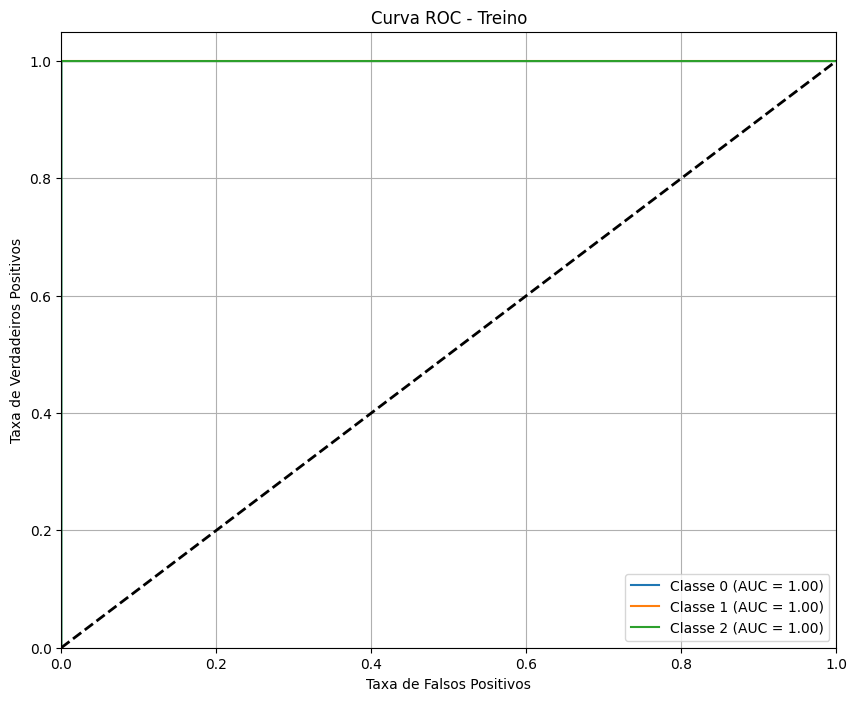

In [7]:

# Calcular as probabilidades de previsão
y_prob = model.predict_proba(X_train)

# Calcular a curva ROC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

# Considerando a classificação binária e convertendo o problema multi-classe
for i in range(3):  # 0: Draw, 1: Home, 2: Away
    fpr[i], tpr[i], _ = roc_curve(y_train == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Treino')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Acurácia: 0.80
AUC: 0.93


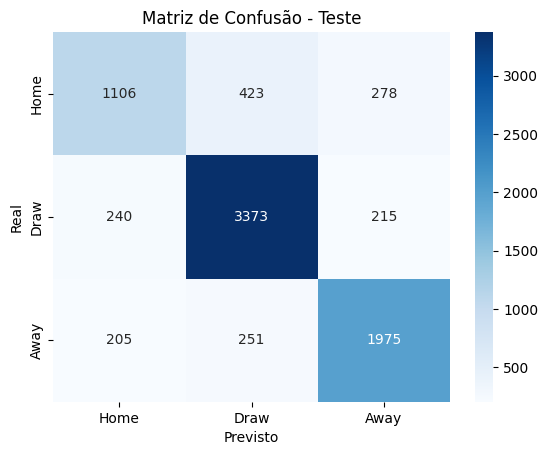

              precision    recall  f1-score   support

        Draw       0.71      0.61      0.66      1807
        Home       0.83      0.88      0.86      3828
        Away       0.80      0.81      0.81      2431

    accuracy                           0.80      8066
   macro avg       0.78      0.77      0.77      8066
weighted avg       0.80      0.80      0.80      8066



In [8]:
predictions = model.predict(X_test)

# Cálculo de métricas
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f'Acurácia: {accuracy:.2f}')
print(f'AUC: {roc_auc:.2f}')

# Matriz de Confusão
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Home', 'Draw', 'Away'], yticklabels=['Home', 'Draw', 'Away'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Teste')
plt.show()

# Gerar o relatório de classificação
report = classification_report(y_test, predictions, target_names=['Draw', 'Home', 'Away'])
print(report)

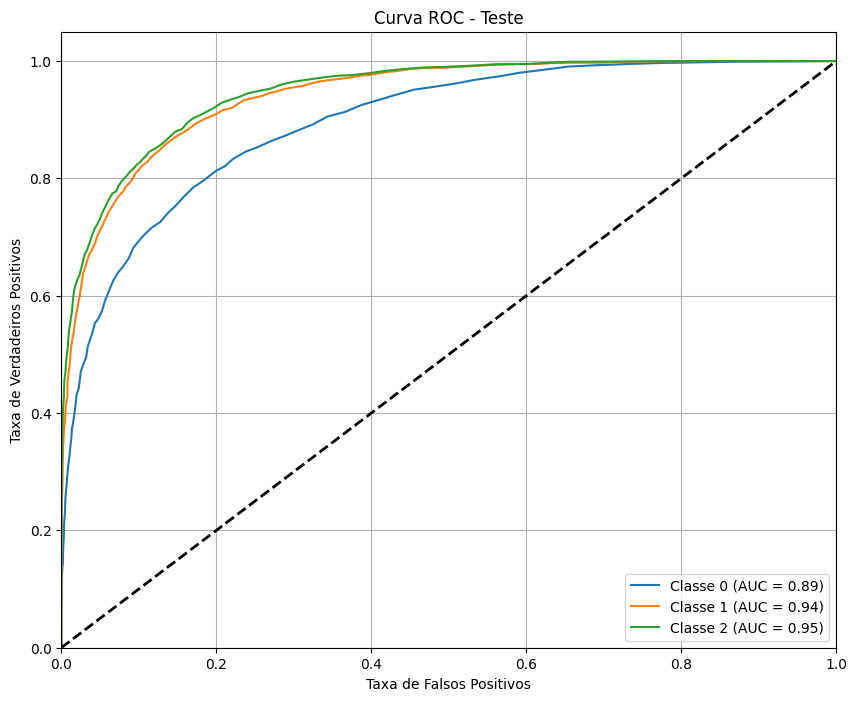

In [9]:
# Calcular as probabilidades de previsão
y_prob = model.predict_proba(X_test)

# Calcular a curva ROC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

# Considerando a classificação binária e convertendo o problema multi-classe
for i in range(3):  # 0: Draw, 1: Home, 2: Away
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Teste')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Otimização

In [10]:
# Importando bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


# Definir o modelo
rf = RandomForestClassifier(random_state=42)

# Definir os hiperparâmetros a serem otimizados
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt']
}

# Definir o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)

# Treinar o modelo e realizar a busca
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores parâmetros: ", grid_search.best_params_)

# Fazer previsões no conjunto de teste
y_pred = grid_search.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia no teste: ", accuracy)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Melhores parâmetros:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Acurácia no teste:  0.8118026283163898


### Modelo Otimizado

In [11]:
model = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=False)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=300)

Acurácia: 0.82
AUC: 0.94


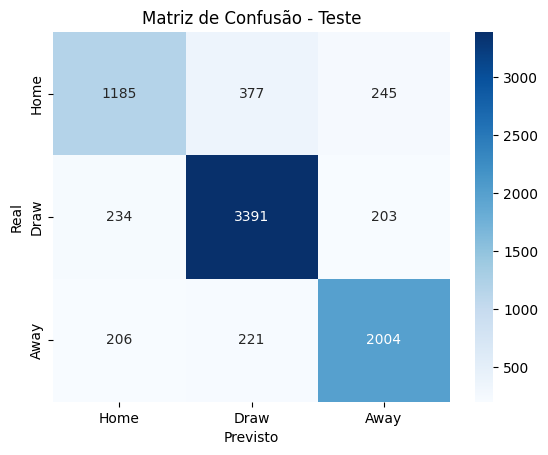

              precision    recall  f1-score   support

        Draw       0.73      0.66      0.69      1807
        Home       0.85      0.89      0.87      3828
        Away       0.82      0.82      0.82      2431

    accuracy                           0.82      8066
   macro avg       0.80      0.79      0.79      8066
weighted avg       0.81      0.82      0.81      8066



In [12]:
predictions = model.predict(X_test)

# Cálculo de métricas
accuracy = accuracy_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f'Acurácia: {accuracy:.2f}')
print(f'AUC: {roc_auc:.2f}')

# Matriz de Confusão
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Home', 'Draw', 'Away'], yticklabels=['Home', 'Draw', 'Away'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Teste')
plt.show()

# Gerar o relatório de classificação
report = classification_report(y_test, predictions, target_names=['Draw', 'Home', 'Away'])
print(report)

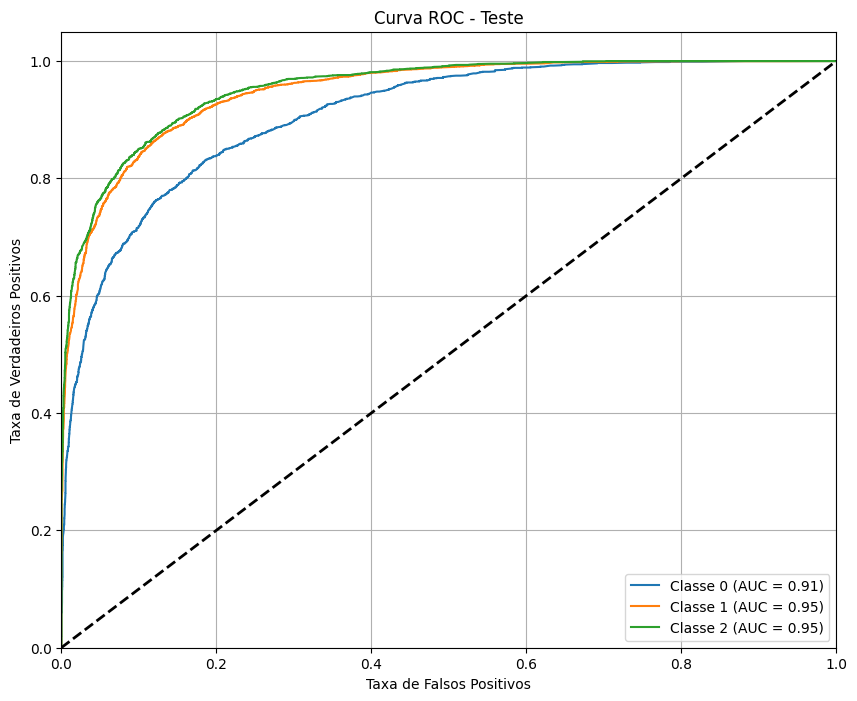

In [13]:
# Calcular as probabilidades de previsão
y_prob = model.predict_proba(X_test)

# Calcular a curva ROC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

# Considerando a classificação binária e convertendo o problema multi-classe
for i in range(3):  # 0: Draw, 1: Home, 2: Away
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar as curvas ROC
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Linha diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Teste')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Submission

In [14]:
X_test = df_test_submission.drop(['Date', 'Time', 'evento'], axis=1)
predictions = model.predict(X_test)


In [15]:
sample = pd.DataFrame(predictions,columns=['WIN'])

In [16]:
sample.replace({ 1:'Home', 2:'Away', 0:'Draw'}, inplace=True)

In [17]:
sample.to_csv('submission.csv', index=True)